# K-means Clustering for Anomaly Detection

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

## Introducing K-means

K-means clustering is a simple and useful unsupervised learning algorithm. The goal of K-means clustering is to group similar data points into a set number (K) of groups. The algorithms does this by identifying 'centroids', which are the centers of clusters, and then allocating data points to the nearest cluster.

Let's try a simple example. First we should generate some clustered data. You could imagine these clusters are different stages in the normal operation of a machine.

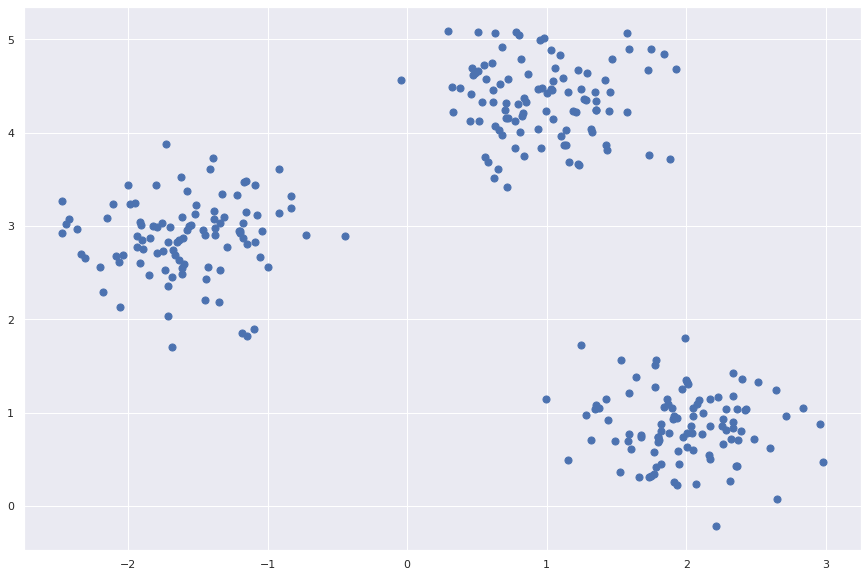

In [ ]:
from sklearn.datasets import make_blobs
num_centers = 3
X_train, y_train_true = make_blobs(n_samples=300, centers=num_centers,
                                   cluster_std=0.40, random_state=0)
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_true, s=50, cmap='viridis');
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);

In [ ]:
X_train.shape

(300, 2)

In [ ]:
X_train[:10]

array([[ 0.61114119,  4.75059384],
       [ 1.76502857,  0.34431808],
       [ 1.28068517,  4.35245733],
       [-1.56127632,  2.99559944],
       [-1.61472042,  2.48426761],
       [-1.52345285,  3.12868394],
       [ 1.24299373,  1.7234608 ],
       [ 0.48609587,  4.64153252],
       [-1.91110577,  2.60063532],
       [-0.83135494,  3.31564002]])

In [ ]:
y_train_true

array([0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2])

In this example it's pretty easy to visual distinguish the clusters.

Now lets use [SKLearn's KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm to fit to the data. This does a lot of the work for us, but if you would like to learn more about the underlying process check out the [wikipedia page](https://en.wikipedia.org/wiki/K-means_clustering#Algorithms)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_centers) #we select three clusters
kmeans.fit(X_train) #we fit the centroids to the data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = kmeans.predict(X_train) #we determine the closest centroid for each datapoint

In [ ]:
y_kmeans

array([0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2], d

Now let's visualize the results. Each datapoint is color-coded according to the centroid they correspond to, and the centroids themselves are shown as black circles.

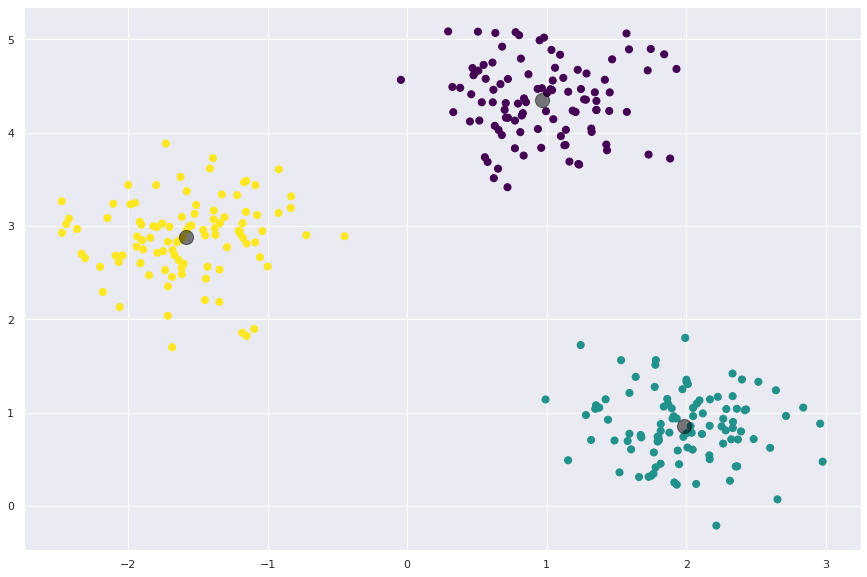

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Looks like K-means does a great job in this simple example! Now let's explore how we can use this for anomaly detection.

Below are new cluster that weren't part of our training data. We will pretend all of these are anomalies for the sake of a simple example. 

One of these clusters is completely different from the data we've seen before and another is only slightly different. We can easily visually separate one of the clusters, but the other one overlaps slightly with one of our training clusters. Given the low dimensionality of the data, it's reasonable that some new data is impossible to distinguish from the training data.

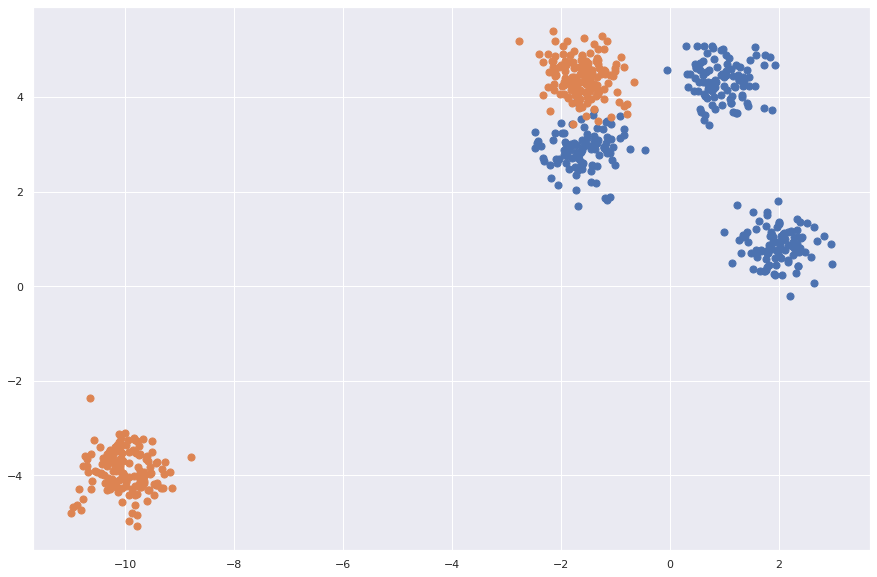

In [ ]:
X_anomaly, y_anomaly_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.40, random_state=1)
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);
plt.scatter(X_anomaly[:,0], X_anomaly[:,1], s=50);

First we will calculate the distances from each datapoint to it's closest cluster center and then we calculate the 99 percentile distance for each center that was observed in the training data. We use the 99 percentile distance here since our training data could have some outliers.

These distances will act as a bounday, beyond which we will classify datapoints as anomalies. The percentile can be adjusted to be more or less sensitive depending on the application and the training data.

In [ ]:
percentile_treshold = 99

train_distances = kmeans.transform(X_train)

center_distances = {key: [] for key in range(num_centers)}
for i in range(len(y_kmeans)):
  min_distance = train_distances[i][y_kmeans[i]]
  center_distances[y_kmeans[i]].append(min_distance)

center_99percentile_distance = {key: np.percentile(center_distances[key], \
                                                   percentile_treshold)   \
                                for key in center_distances.keys()}

print(center_99percentile_distance)



{0: 1.0315363528478958, 1: 1.091797654167742, 2: 1.1415867080723232}


Now let's plot those normal/abnomal boundaries on our training data to see how well they encompass our training data. We will also plot in yellow the points in our training data that are being classified as abnormal.

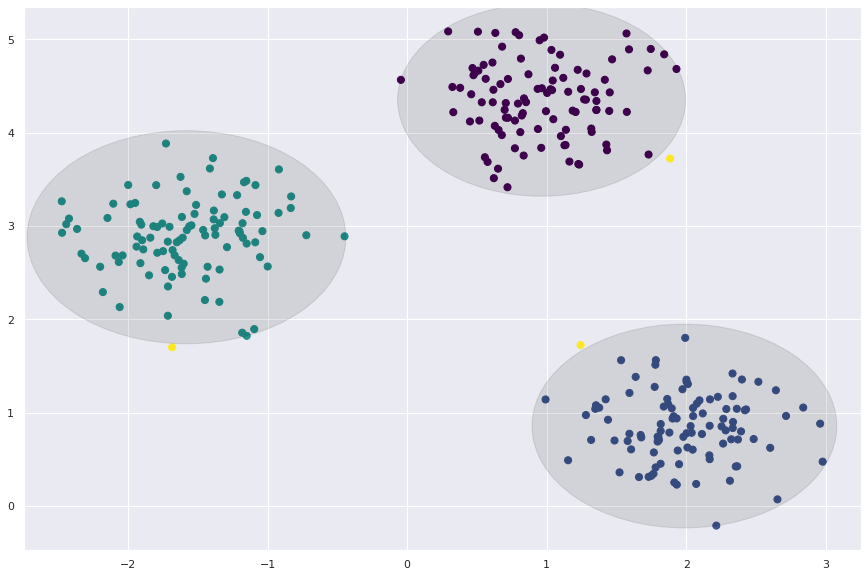

In [ ]:
fig, ax = plt.subplots()

colors = []
for i in range(len(X_train)):
  min_distance = train_distances[i][y_kmeans[i]]
  if (min_distance > center_99percentile_distance[y_kmeans[i]]):
    colors.append(4)
  else:
    colors.append(y_kmeans[i])


ax.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=50, cmap='viridis')

for i in range(len(centers)):
  circle = plt.Circle((centers[i][0], centers[i][1]),center_99percentile_distance[i], color='black', alpha=0.1);
  ax.add_artist(circle)

Now let's add in the abnormal test data to see how it's classified.

Normal datapoints misclassified as abnormal:  3
Abnormal datapoints misclassified as normal:  17


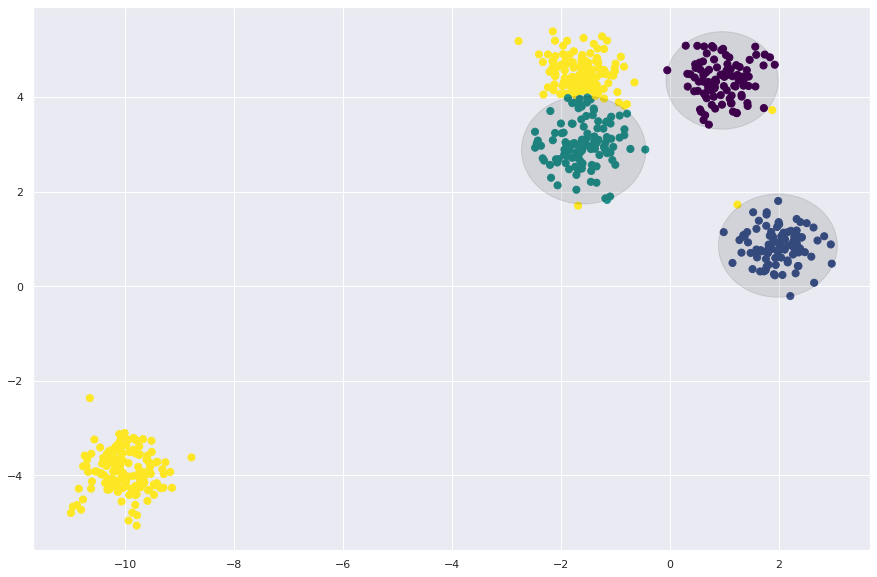

In [ ]:
fig, ax = plt.subplots()

anomaly_distances = kmeans.transform(X_anomaly)
y_anomaly = kmeans.predict(X_anomaly)

#combine all the data
combined_distances = [*train_distances, *anomaly_distances]
combined_y = [*y_kmeans, *y_anomaly]
all_data = np.array([*X_train, *X_anomaly])

false_neg=0
false_pos=0

colors = []
for i in range(len(all_data)):
  min_distance = combined_distances[i][combined_y[i]]
  if (min_distance > center_99percentile_distance[combined_y[i]]):
    colors.append(4)
    if (i<300): #training data is the first 300 elements in the combined list
      false_pos+=1
  else:
    colors.append(combined_y[i])
    if (i>=300):
      false_neg+=1

ax.scatter(all_data[:, 0], all_data[:, 1], c=colors, s=50, cmap='viridis')

for i in range(len(centers)):
  circle = plt.Circle((centers[i][0], centers[i][1]),center_99percentile_distance[i], color='black', alpha=0.1);
  ax.add_artist(circle)

print('Normal datapoints misclassified as abnormal: ', false_pos)
print('Abnormal datapoints misclassified as normal: ', false_neg)

Our simple model did a pretty good job! 

Now we have a way to classify abnormal data in a simple two dimension space. You can adjust the `percentile_treshold` variable to see how that impacts the number of false positives and false negatives.

Now let's see how well this applies to data with more dimensions.

## Additional Readings
If you would like to learn about using reconstruction with K-means for anomaly detection check out: http://amid.fish/anomaly-detection-with-k-means-clustering